In [51]:
# K-NN Nearest Neaibhors
# Importing the Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
# Importing the dataset
dataset = pd.read_csv('C:/Users/Setia Comp/Documents/MAchine Learning/Assignment 1/Iris.csv')


In [69]:
X = dataset.iloc[:, [0, 3]].values
y = dataset.iloc[:, 4].values

In [54]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [55]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [56]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier (n_neighbors=5 ,metric='minkowski', p=2 )
classifier.fit(X_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [57]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [58]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

In [59]:
# evaluate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred) * 100
print('\nThe accuracy of the knn classifier for k = 5 is %d%%' % acc)


The accuracy of the knn classifier for k = 5 is 96%


In [60]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
# empty list that will hold cv scores
cv_scores = []

In [63]:
# Performing 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
# k = 5 for KNeighborsClassifier
# scoring='accuracy' for evaluation metric

from sklearn.cross_validation import cross_val_score

knn=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
print (scores)

[ 1.          0.93333333  1.          0.93333333  0.93333333  0.93333333
  0.86666667  1.          1.          1.        ]


In [70]:
# perform 10-fold cross validation
for k in neighbors:
    from sklearn.cross_validation import cross_val_score
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
   

In [71]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]


In [66]:
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 7.


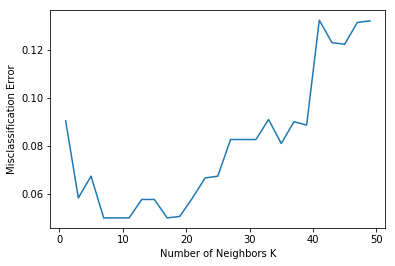

In [67]:
# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

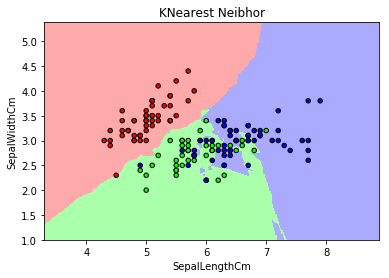

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 5

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("KNearest Neibhor")
    plt.xlabel("SepalLengthCm")
    plt.ylabel("SepalWidthCm")

plt.show()

In [ ]:
#CONCLUSION:- 
#The accuracy of the kNN classifier for k = 5 is 96% by applying Confusion Matrix . 
#The Optimal number of neigbhors using 10 fold CV comes out be 7 which can confined from the graph missclassification error vs K graph.
#We can conclude that with increase in number of neighbors K , MSE error first decreases and after that it increases.
#The Visual plot between SepalLenghtCm and SepalWidthCM of the KNN classifier depicts the decision boundary of different class and the Scattered points predicted by the KNN Classifier. 